### EXERCICIO DADOS VIBRACAÇÃO MOTOR

### IMPORTANDO AS BIBLIOTECAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### CARREGANDO DADOS 

In [2]:
pathVibracoesPadraoMotor = "PADRAOVIBRACAOMOTORSTREAM009CC.txt"
pathVibracoesMotor = "VIBRACAOMOTORSTREAM009CC.txt"

padraoVibracoesMotorDf = pd.read_csv(pathVibracoesPadraoMotor, header = None, names = ["VIBRACAO"])
vibracacoesMotorDf = pd.read_csv(pathVibracoesMotor, header = None, names = ["VIBRACAO"] )

### VISUALIZANDO AS 10 PRIMEIRAS LINHAS DOS DATASETS

In [3]:
padraoVibracoesMotorDf.head(10)

,VIBRACAO
0,0.800000
1,2.255167
2,3.504728
3,4.386549
4,4.815560
5,4.799863
6,4.435818
7,3.883432
8,3.327899
9,2.936296


In [4]:
vibracacoesMotorDf.head(10)

,VIBRACAO
0,0.800000
1,2.257001
2,3.508357
3,4.391889
4,4.822474
5,4.808138
6,4.445151
7,3.893403
8,3.337956
9,2.945747


### ANALISE DESCRITIVA BÁSICA PARA OS DATASETS

In [5]:
estPadrao = padraoVibracoesMotorDf.describe()
estVibracoes = vibracacoesMotorDf.describe()

In [6]:
estPadrao

,VIBRACAO
count,256.000000
mean,0.801323
std,2.487214
min,-4.234171
25%,-1.200688
50%,0.743458
75%,2.905835
max,5.769535


In [7]:
estVibracoes

,VIBRACAO
count,20480.000000
mean,1.330447
std,2.648810
min,-4.454177
25%,-0.707768
50%,1.194665
75%,3.453035
max,8.665039


### DIVIDINDO OS DATSETS EM INTERVALOS DE 256 AMOSTRAS

In [8]:
quantidadeDivisoes = len(vibracacoesMotorDf) // 256
print(f"Quantidade de divisoes: {quantidadeDivisoes}")

listaDataFrames = np.array_split(vibracacoesMotorDf, quantidadeDivisoes)
print(f"Visualizando os dataFrames divididos {listaDataFrames}")

Quantidade de divisoes: 80


c:\Users\vini\miniconda3\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Visualizando os dataFrames divididos [     VIBRACAO
0    0.800000
1    2.257001
2    3.508357
3    4.391889
4    4.822474
..        ...
251 -2.191905
252 -1.898358
253 -1.172081
254 -0.055089
255  1.324529

[256 rows x 1 columns],      VIBRACAO
256  0.800000
257  2.258807
258  3.511830
259  4.396754
260  4.828307
..        ...
507 -1.769428
508 -1.447987
509 -0.708040
510  0.409044
511  1.776198

[256 rows x 1 columns],      VIBRACAO
512  0.800000
513  2.256878
514  3.507164
515  4.388144
516  4.814824
..        ...
763 -2.732072
764 -2.273370
765 -1.371605
766 -0.112791
767  1.339804

[256 rows x 1 columns],       VIBRACAO
768   2.800000
769   4.428375
770   5.826555
771   6.812913
772   7.291661
...        ...
1019 -0.788147
1020 -0.096118
1021  0.632518
1022  1.223355
1023  1.558601

[256 rows x 1 columns],       VIBRACAO
1024  0.800000
1025  2.261683
1026  3.516582
1027  4.401742
1028  4.831863
...        ...
1275 -1.542359
1276 -1.052452
1277 -0.145672
1278  1.096868
1279  2.51613

In [9]:
listaVibracaoDf = []

for indice, dataFrame in enumerate(listaDataFrames):
    df = dataFrame.copy()
    listaVibracaoDf.append(df.reset_index(drop = True)) # type: ignore
    print(listaVibracaoDf[indice])

     VIBRACAO
0    0.800000
1    2.257001
2    3.508357
3    4.391889
4    4.822474
..        ...
251 -2.191905
252 -1.898358
253 -1.172081
254 -0.055089
255  1.324529

[256 rows x 1 columns]
     VIBRACAO
0    0.800000
1    2.258807
2    3.511830
3    4.396754
4    4.828307
..        ...
251 -1.769428
252 -1.447987
253 -0.708040
254  0.409044
255  1.776198

[256 rows x 1 columns]
     VIBRACAO
0    0.800000
1    2.256878
2    3.507164
3    4.388144
4    4.814824
..        ...
251 -2.732072
252 -2.273370
253 -1.371605
254 -0.112791
255  1.339804

[256 rows x 1 columns]
     VIBRACAO
0    2.800000
1    4.428375
2    5.826555
3    6.812913
4    7.291661
..        ...
251 -0.788147
252 -0.096118
253  0.632518
254  1.223355
255  1.558601

[256 rows x 1 columns]
     VIBRACAO
0    0.800000
1    2.261683
2    3.516582
3    4.401742
4    4.831863
..        ...
251 -1.542359
252 -1.052452
253 -0.145672
254  1.096868
255  2.516133

[256 rows x 1 columns]
     VIBRACAO
0    0.800000
1    2.26116

### CALCULANDO O E DIVINDO OS INTERVALOS EM SEGUNDOS

In [10]:
tempoSegundos = 1 / 256
print(tempoSegundos)
divisaoIntervaloSegundo = np.arange(0, 1, tempoSegundos)
print(divisaoIntervaloSegundo)

0.00390625
[0.         0.00390625 0.0078125  0.01171875 0.015625   0.01953125
 0.0234375  0.02734375 0.03125    0.03515625 0.0390625  0.04296875
 0.046875   0.05078125 0.0546875  0.05859375 0.0625     0.06640625
 0.0703125  0.07421875 0.078125   0.08203125 0.0859375  0.08984375
 0.09375    0.09765625 0.1015625  0.10546875 0.109375   0.11328125
 0.1171875  0.12109375 0.125      0.12890625 0.1328125  0.13671875
 0.140625   0.14453125 0.1484375  0.15234375 0.15625    0.16015625
 0.1640625  0.16796875 0.171875   0.17578125 0.1796875  0.18359375
 0.1875     0.19140625 0.1953125  0.19921875 0.203125   0.20703125
 0.2109375  0.21484375 0.21875    0.22265625 0.2265625  0.23046875
 0.234375   0.23828125 0.2421875  0.24609375 0.25       0.25390625
 0.2578125  0.26171875 0.265625   0.26953125 0.2734375  0.27734375
 0.28125    0.28515625 0.2890625  0.29296875 0.296875   0.30078125
 0.3046875  0.30859375 0.3125     0.31640625 0.3203125  0.32421875
 0.328125   0.33203125 0.3359375  0.33984375 0.3437

### VISUALIZANDO AS VIBRAÇÕES DO MOTOR FUNCIONANDO CORRETAMENTE

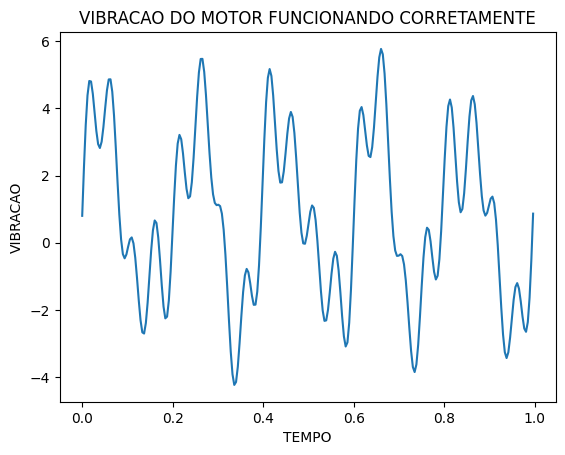

In [11]:
plt.plot(divisaoIntervaloSegundo, padraoVibracoesMotorDf)
plt.title("VIBRACAO DO MOTOR FUNCIONANDO CORRETAMENTE")
plt.ylabel("VIBRACAO")
plt.xlabel("TEMPO")
plt.show()

### CALCULANDO CORRELAÇÃO PARA TOMADA DE DECISÃO

In [ ]:
listaProblemasMotor = []
limite = 0.75

for indice, df in enumerate(listaVibracaoDf):
    correlacaoPadrao = padraoVibracoesMotorDf.corrwith(df)
    correlacaoPadrao = float(correlacaoPadrao.iloc[0])
    
    corGrafico = 'g'
    
    if correlacaoPadrao < limite:
        corGrafico = 'r'
    
    plt.plot(divisaoIntervaloSegundo, padraoVibracoesMotorDf, 'b', label="Padrao")
    plt.plot(divisaoIntervaloSegundo, df, corGrafico, label="Motor comparado")
    plt.title(f"VIBRACAO MOTOR {indice + 1}")
    plt.ylabel("VIBRACAO")
    plt.xlabel("TEMPO")
    plt.legend()
    plt.show()

    print(f"A correlacao do padrao com o motor deu: {round(correlacaoPadrao,2)}")

    if correlacaoPadrao > limite:
        continue
    
    elif len(listaProblemasMotor) == 0:
        print("PROBLEMA NO MOTOR!!")
        resposta = input("Quer salvar este problema? (S/N)").lower()
        if (resposta == 's'):
            nomeProblema = input("Nome do problema: ")
            listaProblemasMotor.append([nomeProblema, df])
    
    else:
        print("PROBLEMA NO MOTOR!!")
        for problema in listaProblemasMotor:
            correlacaoProblema = problema[1].corrwith(df)
            correlacaoProblema = float(correlacaoProblema.iloc[0])
            print(f"A correlacao do problema {problema[0]} com o motor deu: {round(correlacaoProblema,2)}")

            if correlacaoProblema <= limite:
                corGrafico = 'g'
            
            elif correlacaoProblema >= limite:
                corGrafico = 'r'

            plt.plot(divisaoIntervaloSegundo, problema[1], color = "hotpink", label= problema[0])
            plt.plot(divisaoIntervaloSegundo, df, corGrafico, label="Motor comparado")
            plt.title(f"VIBRACAO MOTOR {indice + 1}")
            plt.ylabel("VIBRACAO")
            plt.xlabel("TEMPO")
            plt.legend()
            plt.show()
            
            if correlacaoProblema >= limite:
                porcentagemCorrelacao = round((correlacaoProblema * 100), 2)
                print(f"O motor pode ter problema de: '{problema[0]}' com chance de {porcentagemCorrelacao}")
        
        resposta = input("Quer salvar este problema? (S/N)").lower()
        if (resposta == 's'):
            nomeProblema = input("Nome do problema: ")
            listaProblemasMotor.append([nomeProblema, df])
        